# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set variables for base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Setup URL query using the base url, api key, and units
query_url = f"{url}appid={api_key}&units={units}&q="

# Create lists to hold relevant data
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
latitude_list = []
longitude_list = []
maxtemperature_list = []
windspeed_list = []

# City counter for loop
citycounter = 0

# Header of print log
print("Retrieving data.")
print("----------------")

# Loop through list of cities
for eachcity in cities:
    
    # Perform a get request for each city and store json response in a variable
    jsonresponse = requests.get(query_url + eachcity).json()
    
    # Handle errors for cities with missing data
    try:
        
        # Retrieve specific data and append to relevant list
        # City
        city = jsonresponse['name']
        city_list.append(city)
        # Cloudiness
        cloudiness = jsonresponse['clouds']['all']
        cloudiness_list.append(cloudiness)
        # Country
        country = jsonresponse['sys']['country']
        country_list.append(country)
        # Data
        date = jsonresponse["dt"]
        date_list.append(date)
        # Humidity
        humidity = jsonresponse['main']['humidity']
        humidity_list.append(humidity)
        # Latitude
        latitude = jsonresponse['coord']['lat']
        latitude_list.append(latitude)
        # Longitude
        longitude = jsonresponse['coord']['lon']
        longitude_list.append(longitude)
        # Max temperature
        maxtemperature = jsonresponse['main']['temp_max']
        maxtemperature_list.append(maxtemperature)
        # Wind speed
        windspeed = jsonresponse['wind']['speed']
        windspeed_list.append(windspeed)
        
        # Track city count
        citycounter = citycounter + 1
        
        # Print log of each city
        print(f"City number {citycounter} is named {eachcity}.")
    
    except:
        # If the city is missing data, print different log and move to next city
        print('The data is incomplete for this city. Moving to next city...')
        pass

# Footer of print log
print("-----------------------------")
print("City data retrieval complete.")

Retrieving data...
------------------
City number 1 is named rikitea.
City number 2 is named faanui.
City number 3 is named bredasdorp.
City number 4 is named luderitz.
City number 5 is named avarua.
City number 6 is named puerto ayora.
City number 7 is named new norfolk.
City number 8 is named afua.
City number 9 is named adrar.
City number 10 is named tiksi.
City number 11 is named ushuaia.
City number 12 is named karratha.
City number 13 is named luanda.
City number 14 is named leku.
City number 15 is named saskylakh.
City number 16 is named hermanus.
City number 17 is named georgetown.
City number 18 is named lebu.
City number 19 is named khatanga.
The data is incomplete for this city. Moving to next city...
City number 20 is named clyde river.
City number 21 is named kapaa.
City number 22 is named severo-kurilsk.
City number 23 is named vaini.
City number 24 is named lorengau.
City number 25 is named airai.
The data is incomplete for this city. Moving to next city...
City number 2

City number 207 is named bom jesus do galho.
The data is incomplete for this city. Moving to next city...
City number 208 is named kodiak.
City number 209 is named kattivakkam.
City number 210 is named san felipe.
City number 211 is named port hedland.
City number 212 is named tim.
City number 213 is named ikalamavony.
City number 214 is named yulara.
City number 215 is named manta.
City number 216 is named hambantota.
City number 217 is named malayal.
City number 218 is named high level.
City number 219 is named grand gaube.
City number 220 is named aykhal.
City number 221 is named adet.
City number 222 is named biella.
The data is incomplete for this city. Moving to next city...
City number 223 is named cayenne.
City number 224 is named moron.
City number 225 is named jensen beach.
City number 226 is named los llanos de aridane.
City number 227 is named amahai.
City number 228 is named elk city.
City number 229 is named hit.
City number 230 is named mabaruma.
City number 231 is named

City number 404 is named kungurtug.
City number 405 is named baglung.
City number 406 is named bahir dar.
City number 407 is named kalmunai.
City number 408 is named abnub.
City number 409 is named ozernovskiy.
City number 410 is named saint-philippe.
City number 411 is named vaitape.
City number 412 is named belyy yar.
City number 413 is named beauraing.
The data is incomplete for this city. Moving to next city...
City number 414 is named el carmen.
The data is incomplete for this city. Moving to next city...
City number 415 is named sawakin.
City number 416 is named cartagena.
City number 417 is named petrivka.
City number 418 is named kahului.
City number 419 is named hoi an.
City number 420 is named new albany.
City number 421 is named ko samui.
City number 422 is named bontang.
City number 423 is named hirado.
City number 424 is named khartoum.
City number 425 is named januaria.
City number 426 is named verkhnetulomskiy.
City number 427 is named fort nelson.
City number 428 is nam

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display data in a data frame
cityweather_df = pd.DataFrame({"City" : city_list, "Cloudiness" : cloudiness_list,
                          "Country" : country_list, "Date" : date_list,
                          "Humidity" : humidity_list, "Latitude" : latitude_list, 
                          "Longitude" : longitude_list, "Max Temperature" : maxtemperature_list, 
                          "Wind Speed" : windspeed_list})

# Convert 'Date' column to display in readable format
cityweather_df['Date'] = pd.to_datetime(cityweather_df['Date'], unit = 's')

cityweather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Rikitea,43,PF,2022-02-11 05:56:48,74,-23.1203,-134.9692,79.25,15.99
1,Faanui,29,PF,2022-02-11 06:01:32,72,-16.4833,-151.7500,81.63,13.73
2,Bredasdorp,0,ZA,2022-02-11 06:01:32,62,-34.5322,20.0403,62.28,3.11
3,Lüderitz,48,NA,2022-02-11 06:01:33,73,-26.6481,15.1594,68.56,3.15
4,Avarua,14,CK,2022-02-11 06:01:33,83,-21.2078,-159.7750,78.85,9.22
...,...,...,...,...,...,...,...,...,...
551,Beringovskiy,28,RU,2022-02-11 06:05:32,96,63.0500,179.3167,-26.36,8.21
552,Nizhnyaya Tavda,39,RU,2022-02-11 06:05:33,81,57.6731,66.1725,0.57,11.43
553,Rafsanjān,0,IR,2022-02-11 06:05:33,14,30.4067,55.9939,56.70,2.95
554,Ihosy,79,MG,2022-02-11 06:03:35,75,-22.4000,46.1167,74.10,5.50


In [5]:
# Export to CSV file
cityweather_df.to_csv("Output/cityweather.csv", index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
# Used information from:
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

# Get the indices of cities that have humidity over 100%.
humidityindex = cityweather_df[cityweather_df['Humidity'] > 100 ].index

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "cleancitydata_df".
cleancitydata_df = cityweather_df.drop(humidityindex, inplace = False)

# Same number of rows indicates that zero cities had a humidity > 100
cleancitydata_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Rikitea,43,PF,2022-02-11 05:56:48,74,-23.1203,-134.9692,79.25,15.99
1,Faanui,29,PF,2022-02-11 06:01:32,72,-16.4833,-151.7500,81.63,13.73
2,Bredasdorp,0,ZA,2022-02-11 06:01:32,62,-34.5322,20.0403,62.28,3.11
3,Lüderitz,48,NA,2022-02-11 06:01:33,73,-26.6481,15.1594,68.56,3.15
4,Avarua,14,CK,2022-02-11 06:01:33,83,-21.2078,-159.7750,78.85,9.22
...,...,...,...,...,...,...,...,...,...
551,Beringovskiy,28,RU,2022-02-11 06:05:32,96,63.0500,179.3167,-26.36,8.21
552,Nizhnyaya Tavda,39,RU,2022-02-11 06:05:33,81,57.6731,66.1725,0.57,11.43
553,Rafsanjān,0,IR,2022-02-11 06:05:33,14,30.4067,55.9939,56.70,2.95
554,Ihosy,79,MG,2022-02-11 06:03:35,75,-22.4000,46.1167,74.10,5.50


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

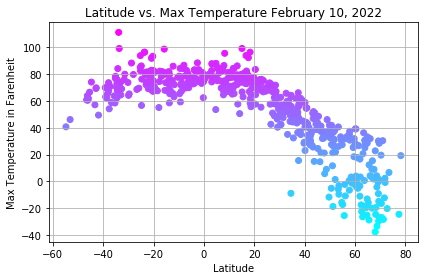

In [59]:
# Used information from:
# https://www.programiz.com/python-programming/datetime/current-datetime

# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Max Temperature'], 
            c =cleancitydata_df['Max Temperature'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Max Temperature ' + time.strftime('%B %d, %Y'))
plt.ylabel('Max Temperature in Farenheit')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-temperature.png')

plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression